In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'./cast.csv')

# Section 1

## Question 1

In [62]:
def deminal_to_all_bases(num):
    if (not isinstance(num, int)):
        print("This is not a number")
        return
    
    print(f"base-2 {bin(num)}")
    print(f"base-16 {hex(num)}")
    print(f"base-8 {oct(num)}")

deminal_to_all_bases(24)

base-2 0b11000
base-16 0x18
base-8 0o30


## Section 2

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333695 entries, 0 to 3333694
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 152.6+ MB


In [64]:
df.head()
df.drop_duplicates()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


### Q1

We need to isolate each movie, and discartd is actors.

In [65]:
df.loc[df['title'] == "Hamlet"].groupby('year')['title'].value_counts().count()

17

### Q2

Get all the titles that contains Treasure Island, sort them by year, and show only the title and year

In [66]:
df.loc[df["title"] == "Treasure Island"].sort_values(['year']).loc[:,['title','year']].drop_duplicates()

,title,year
1312766,Treasure Island,1918
1404517,Treasure Island,1920
926924,Treasure Island,1934
1979467,Treasure Island,1950
961365,Treasure Island,1972
1954811,Treasure Island,1973
1137587,Treasure Island,1985
104905,Treasure Island,1999


### Q3

In [67]:
df.loc[(df['year'] == 1921) & (df['title'].str.contains("Hamlet"))]['name'].value_counts().count()

9

### Q4

array([[<AxesSubplot:title={'center':'Interval'}>]], dtype=object)

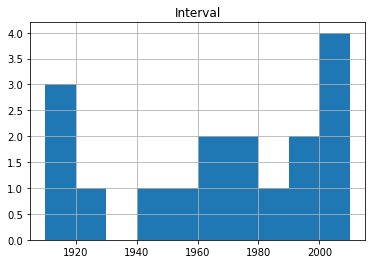

In [80]:
ham_df = df.loc[df['title'] == "Hamlet"]

q4_df = ham_df.groupby('year').sum().reset_index(0)
q4_df["Interval"] = (10 * (q4_df["year"] // 10))
q4_df.drop(['year','n'],axis=1).hist()

### Q5

In [86]:
df.loc[(df['n'] == 1)&(1950 <= df['year'])&(df['year'] < 1960)].groupby('type')['n'].count()

type
actor      6388
actress    2813
Name: n, dtype: int64

In [101]:
top10 = df.loc[((df['n'] == 1)) & (df['year'] >= 1990)].groupby('name').count()['n'].sort_values(ascending=False)
top10.head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
Name: n, dtype: int64

In [126]:
q7_df = df.loc[df["name"] == "Frank Oz"]
q7_df['No. Roles'] = 1
q7_df = q7_df.groupby(['title','year']).agg({'No. Roles' : 'sum'}).reset_index(1)
q7_df.loc[q7_df['No. Roles'] > 1].sort_values('year')

/tmp/ipykernel_34611/103443143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q7_df['No. Roles'] = 1


,year,No. Roles
title,,
The Muppet Movie,1979,8
An American Werewolf in London,1981,2
The Great Muppet Caper,1981,6
The Dark Crystal,1982,2
The Muppets Take Manhattan,1984,7
Sesame Street Presents: Follow that Bird,1985,3
The Muppet Christmas Carol,1992,7
Muppet Treasure Island,1996,4
Muppets from Space,1999,4
